**Morphological Operations with OpenCV**

In this notebook we will demonstrate morphological operations with OpenCV. The purpose of these operations is clean up noise like small white dots or black dots. They are often useful preprocessing steps before an OCR (Optical Character Recognition), where if used correctly they improve the quality of recognition.

# Import Libraries

In [1]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Input the Image

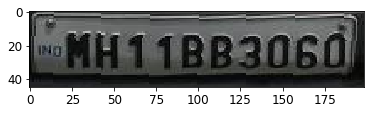

In [2]:
image = cv2.imread('images/number_plate.jpg')
plt.imshow(fixColor(image))

# PreProcessing the Image
In the preprocessing step we will convert the image to grayscale. We will also threshold the image to binarize it and seperate all pixels to black or white.

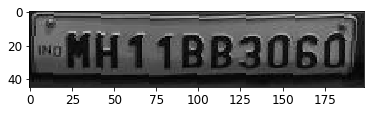

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(gray))

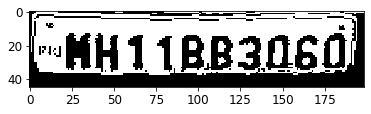

In [4]:
ret2,th2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(fixColor(th2))

# Morphological Operations
## Dilation
We first create a 3×3 kernel or matrix and then run a convolution over the entire image. Dilation increases the whitespace, reducing noise or small dark spots in the image. After small dark pixels are eliminated, the bigger numbers are now clearly delineated, but may be smaller.

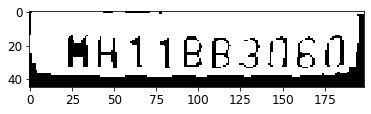

In [5]:
kernel = np.ones((3, 3), np.uint8)
img = cv2.dilate(th2, kernel, iterations=1)
plt.imshow(fixColor(img))

## Erosion

Erosion is the 2nd morphological operation we will see today. We will use the same kernel. Erosion will make the dark letters a little bigger and easier to read.

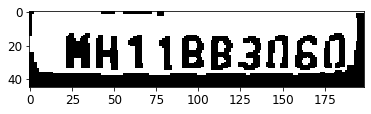

In [6]:
img = cv2.erode(img, kernel, iterations=1)
plt.imshow(fixColor(img))

## Closure
OpenCV provides a higher level function which lets us do both the steps first dilation and then erosion with a MORPH_CLOSE. The example is below. We get the same results as above.

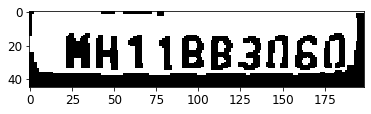

In [7]:
closing = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)
plt.imshow(fixColor(closing))

In [11]:
images = [image, gray, th2, img, closing, closing]

In [12]:
titles = ['Original', 'Gray', 'Threshold', 'Dilated', 'Eroded', 'Closed']

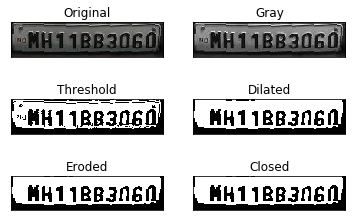

In [14]:
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()